<a href="https://colab.research.google.com/github/Dr-Carlos-Villasenor/TopicosAvanzadosComputacion2/blob/master/DL_L02_P04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tópicos Avanzados de Computación II
##Dr. Carlos Villaseñor
##Lección 2 - Redes neuronales de una sola neurona
### Programación de regla delta una neurona

Primeramente importemos unos paquetes importantes

In [1]:
import numpy as np

In [2]:
def linear(z, derivative=False):
    a = z
    if derivative:
        da = np.ones(z.shape)
        return a, da
    return a


def logistic(z, derivative=False):
    a = 1/(1 + np.exp(-z))
    if derivative:
        da = a * (1 - a)
        return a, da
    return a


def tanh(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1 - a) * (1 + a)
        return a, da
    return a


def relu(z, derivative=False):
    a = z * (z >= 0) 
    if derivative:
        da = np.array(z >= 0, dtype=float)
        return a, da
    return a

In [7]:
class neuron:

    def __init__(self, n_inputs, 
                 activation_funtion=linear, learning_rate=0.1):
        self.w = - 1 + 2 * np.random.rand(n_inputs)
        self.b = - 1 + 2 * np.random.rand()
        self.eta = learning_rate
        self.f = activation_funtion

    def predict(self, X):
        Z = np.dot(self.w, X) + self.b
        return self.f(Z)

    def train(self, X, Y, L2=0, epochs=1000):
        
        p = X.shape[1]
        for _ in range(epochs):
            
            # Propagation ----------------------------------------------------- 
            Z = np.dot(self.w, X) + self.b
            Yest, dY = self.f(Z, derivative=True)
            
            # Training --------------------------------------------------------
            
            # Calculate local gradient
            lg = (Y - Yest) * dY 
            
            # Update parameters
            self.w = (1 - L2*self.eta) * self.w + (self.eta/p) * np.dot(lg, X.T).ravel()
            self.b += (self.eta/p) * np.sum(lg)


[0.3665836  0.17891944 0.28555504 0.13080551]
[0.00325467 0.12147064 0.12147227 0.85411728]


Text(0, 0.5, '$x_2$')

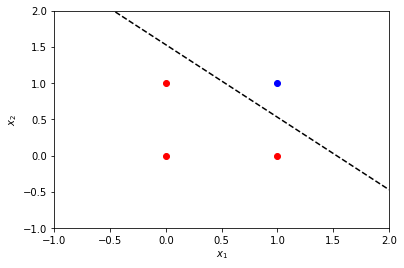

In [4]:
import matplotlib.pyplot as plt

X = np.array([[0, 0, 1, 1],
                  [0, 1, 0, 1]])
Y = np.array([[0, 0, 0, 1]])


neuron = neuron(2, logistic, 1)
print(neuron.predict(X))

neuron.train(X,Y, epochs=1000)

print(neuron.predict(X))
    
p = X.shape[1]
for i in range(p):
    if Y[0,i] == 0:
        plt.plot(X[0,i], X[1,i], 'or')
    else:
        plt.plot(X[0,i], X[1,i], 'ob')
            
w1, w2, b = neuron.w[0], neuron.w[1], neuron.b 
plt.plot([-2, 2],[(1/w2)*(-w1*(-2)-b),(1/w2)*(-w1*2-b)],'--k')

plt.xlim([-1,2])
plt.ylim([-1,2])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

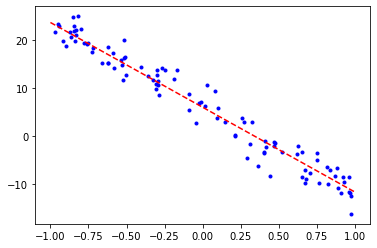

In [9]:
import matplotlib.pyplot as plt
p = 100
x = -1 + 2 * np.random.rand(p).reshape(1,-1)
y = -18 * x + 6 + 2.5 * np.random.randn(p)
plt.plot(x,y,'.b')

n = neuron(1, linear, 0.1)
n.train(x, y, epochs=100)

xn = np.array([[-1, 1]])
plt.plot(xn.ravel() ,n.predict(xn),'--r')